In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from matplotlib.colors import to_rgba
from tqdm.notebook import tqdm 

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")

In [2]:
import numpy as np
import torch
import torch.utils.data as data
from torch import nn

In [3]:
print("Using torch", torch.__version__)

Using torch 2.1.2+cu118


In [4]:
torch.manual_seed(42)

## Pytorch Tensors

### Initialization

In [5]:
torch.Tensor([2, 3])

tensor([2., 3.])

In [6]:
torch.Tensor(2, 3)

tensor([[-1.5304e-28,  1.2303e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [7]:
torch.tensor([2, 3])

tensor([2, 3])

In [8]:
torch.zeros((2, 3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [9]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [10]:
torch.rand(2, 3)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [11]:
torch.randn(2, 3)

tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])

In [12]:
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x = torch.randn(3, 3)
print("Shape:\n", x.shape)
print("size:\n", x.size())

Shape:
 torch.Size([3, 3])
size:
 torch.Size([3, 3])


### Conversion from and to Numpy

In [14]:
np_arr = np.array([[1, 2], [7, 5]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:\n", np_arr)
print("PyTorch tensor:\n", tensor)

Numpy array:
 [[1 2]
 [7 5]]
PyTorch tensor:
 tensor([[1, 2],
        [7, 5]], dtype=torch.int32)


In [15]:
print("Numpy array:\n", tensor.numpy())

Numpy array:
 [[1 2]
 [7 5]]


In [16]:
x = torch.randn(2, 2, device = "cuda")
x.device

device(type='cuda', index=0)

In [17]:
print("Numpy array:\n", x.cpu().numpy())

Numpy array:
 [[ 0.1940188   2.1613736 ]
 [-0.17205022  0.8490601 ]]


### Operations

In [18]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
x3 = torch.rand(3, 2)

In [19]:
print("x1 + x2:")
print(x1 + x2)
print("\nx1 - x2:")
print(x1 - x2)
print("\nx1 * x2:")
print(x1 * x2)
print("\nx1 / x2:")
print(x1 / x2)

x1 + x2:
tensor([[1.3437, 0.6237, 1.4230],
        [0.9539, 1.4643, 1.1417]])

x1 - x2:
tensor([[-0.2344,  0.0609, -0.1543],
        [-0.2251, -0.0435,  0.7512]])

x1 * x2:
tensor([[0.4376, 0.0963, 0.5003],
        [0.2148, 0.5356, 0.1848]])

x1 / x2:
tensor([[0.7030, 1.2164, 0.8044],
        [0.6182, 0.9423, 4.8472]])


In [20]:
print(x1)
x1.add_(10)
print(x1)

tensor([[0.5547, 0.3423, 0.6343],
        [0.3644, 0.7104, 0.9464]])
tensor([[10.5547, 10.3423, 10.6343],
        [10.3644, 10.7104, 10.9464]])


In [21]:
x1 @ x3

tensor([[ 8.1067, 20.1723],
        [ 8.3496, 20.6697]])

In [22]:
x1.matmul(x3)

tensor([[ 8.1067, 20.1723],
        [ 8.3496, 20.6697]])

In [23]:
x1.mm(x3)

tensor([[ 8.1067, 20.1723],
        [ 8.3496, 20.6697]])

### Modifying Shapes

In [24]:
x = torch.randn(3, 5)
x

tensor([[-1.3323, -0.0499,  0.5263, -0.0085,  0.7291],
        [ 0.1331,  0.8640, -1.0157, -0.8887,  0.1498],
        [-0.2089, -0.3870,  0.9912,  0.4679, -0.2049]])

In [25]:
x.shape

torch.Size([3, 5])

In [26]:
x.view(5, 3).shape

torch.Size([5, 3])

In [27]:
x.view(-1).shape

torch.Size([15])

In [28]:
x.permute(1, 0).shape

torch.Size([5, 3])

In [29]:
x.permute(1, 0) == x.view(5, 3)

tensor([[ True, False, False],
        [False, False, False],
        [False,  True, False],
        [False, False, False],
        [False, False,  True]])

In [30]:
x

tensor([[-1.3323, -0.0499,  0.5263, -0.0085,  0.7291],
        [ 0.1331,  0.8640, -1.0157, -0.8887,  0.1498],
        [-0.2089, -0.3870,  0.9912,  0.4679, -0.2049]])

In [31]:
x.permute(1, 0)

tensor([[-1.3323,  0.1331, -0.2089],
        [-0.0499,  0.8640, -0.3870],
        [ 0.5263, -1.0157,  0.9912],
        [-0.0085, -0.8887,  0.4679],
        [ 0.7291,  0.1498, -0.2049]])

In [32]:
x.view(5, 3)

tensor([[-1.3323, -0.0499,  0.5263],
        [-0.0085,  0.7291,  0.1331],
        [ 0.8640, -1.0157, -0.8887],
        [ 0.1498, -0.2089, -0.3870],
        [ 0.9912,  0.4679, -0.2049]])

### Indexing

In [33]:
x[1, :]

tensor([ 0.1331,  0.8640, -1.0157, -0.8887,  0.1498])

In [34]:
x[:, 2]

tensor([ 0.5263, -1.0157,  0.9912])

## Dynamic Computaitonal Graph and Backpropagation

### Calculating Gradient

In [35]:
x = torch.arange(3, dtype=torch.float32)
print(x.requires_grad)

False


In [36]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [37]:
def f(x):
    a = x + 2
    b = a ** 2
    c = b + 3
    y = c.mean()
    return a, b, c, y

In [38]:
a, b, c, y = f(x)
x, a, b, c, y

(tensor([0., 1., 2.], requires_grad=True),
 tensor([2., 3., 4.], grad_fn=<AddBackward0>),
 tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>),
 tensor([ 7., 12., 19.], grad_fn=<AddBackward0>),
 tensor(12.6667, grad_fn=<MeanBackward0>))

In [39]:
y.backward()

In [40]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

### Leveraging GPUs

In [41]:
print(f"GPU is available: {torch.cuda.is_available()}")

GPU is available: True


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [43]:
x = torch.zeros(3, 4)
print(x)
x = x.to(device)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')


In [44]:
# GPU vs CPU
x = torch.randn(1000, 1000)

start = time.time()
torch.matmul(x, x)
end = time.time()

print(f"CPU Time: {end - start:6.5f}s")

if torch.cuda.is_available():
    # CUDA is asynchronous, so we need to use different timing functions
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()
    print(f"CPU Time: {start.elapsed_time(end) * 0.001:6.5f}s")

CPU Time: 0.01735s
CPU Time: 0.03669s


In [45]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Learning by Example: Continuous XOR

### The model

In [46]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_outputs)
        self.act_fn = nn.Tanh()

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [47]:
model = SimpleClassifier(2, 8, 1)
model

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=1, bias=True)
  (act_fn): Tanh()
)

In [48]:
for name, param in model.named_parameters():
    print(f"{name}\t: {param.shape}")

linear1.weight	: torch.Size([8, 2])
linear1.bias	: torch.Size([8])
linear2.weight	: torch.Size([1, 8])
linear2.bias	: torch.Size([1])


### The Data

In [49]:
data.Dataset # a uniform interface to access the training/test data

torch.utils.data.dataset.Dataset

In [50]:
data.DataLoader # efficiently load and stack the data points from the dataset into batches during training.

torch.utils.data.dataloader.DataLoader

In [51]:
class XORDataset(torch.utils.data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.

        Args:
            size: Number of data points we want to generate
            std: Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(0, 2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.int8)
        data += self.std * torch.randn(data.shape)
        self.data = data
        self.label = label

    def __len__(self):
        return self.size
    
    def __getitem__(self, index):
        data_point = self.data[index]
        data_label = self.label[index]
        return data_point, data_label

In [52]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(5, 5))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolors="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolors="#333", label="Class 1")
    plt.title("Dataset Samples")
    plt.xlabel(r"$x_2$")
    plt.ylabel(r"$x_1$")
    plt.legend()

In [53]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.0247, 0.1263]), tensor(1, dtype=torch.int8))


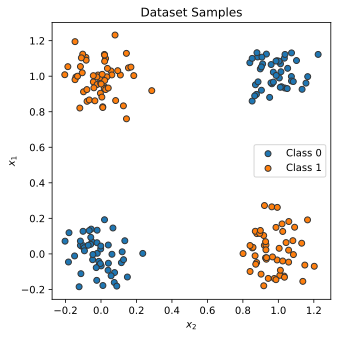

In [54]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [55]:
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=8,
    shuffle=True
)

In [56]:
next(iter(data_loader))

[tensor([[ 0.1272, -0.0325],
         [-0.0168,  1.0069],
         [ 0.9930,  1.0873],
         [ 0.8689, -0.0106],
         [ 0.0184,  0.9321],
         [ 0.8534,  0.0337],
         [ 0.0210,  0.9760],
         [ 0.9584,  0.9628]]),
 tensor([0, 1, 0, 1, 1, 1, 1, 0], dtype=torch.int8)]

### Optimization

In [57]:
loss_module = nn.BCEWithLogitsLoss()

In [58]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [59]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [60]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=1, bias=True)
  (act_fn): Tanh()
)

In [61]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train()

    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # Step 1: move data into the appropriate device
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: Run the model on input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)

            # Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            # Step 4: Perform backpropagation
            # ensure gradients are zero
            optimizer.zero_grad()
            # perform backpropagation
            loss.backward()

            # Step 5: Update the parameters
            optimizer.step()

In [62]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

### Saving the model

In [63]:
state_dict = model.state_dict() # extract learnable parameters
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 0.1104, -0.1428],
        [ 1.3334, -0.7257],
        [-0.4074, -0.6611],
        [ 1.2638,  1.2890],
        [ 0.7731, -0.9983],
        [ 0.2185, -0.4798],
        [-1.1272,  1.4642],
        [-0.6206,  0.6337]], device='cuda:0')), ('linear1.bias', tensor([ 0.0728,  0.2709,  0.1375,  0.0285, -0.6629, -0.4028,  0.7064, -0.4304],
       device='cuda:0')), ('linear2.weight', tensor([[ 0.1045, -1.1166, -0.2091,  1.5834,  0.5965,  0.2237, -1.2063,  0.4438]],
       device='cuda:0')), ('linear2.bias', tensor([0.2320], device='cuda:0'))])


In [64]:
torch.save(state_dict, "models/model_xor_continuous.tar")

In [65]:
state_dict = torch.load("models/model_xor_continuous.tar")

# Create a new model and load the state
new_model = SimpleClassifier(2, 8, 1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 0.1104, -0.1428],
        [ 1.3334, -0.7257],
        [-0.4074, -0.6611],
        [ 1.2638,  1.2890],
        [ 0.7731, -0.9983],
        [ 0.2185, -0.4798],
        [-1.1272,  1.4642],
        [-0.6206,  0.6337]], device='cuda:0')), ('linear1.bias', tensor([ 0.0728,  0.2709,  0.1375,  0.0285, -0.6629, -0.4028,  0.7064, -0.4304],
       device='cuda:0')), ('linear2.weight', tensor([[ 0.1045, -1.1166, -0.2091,  1.5834,  0.5965,  0.2237, -1.2063,  0.4438]],
       device='cuda:0')), ('linear2.bias', tensor([0.2320], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 0.1104, -0.1428],
        [ 1.3334, -0.7257],
        [-0.4074, -0.6611],
        [ 1.2638,  1.2890],
        [ 0.7731, -0.9983],
        [ 0.2185, -0.4798],
        [-1.1272,  1.4642],
        [-0.6206,  0.6337]])), ('linear1.bias', tensor([ 0.0728,  0.2709,  0.1375,  0.0285, -0.6629, -0.4028,  0.7064, -0.4304])), ('linear2.weight', tensor([[

### Evaluation

In [66]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [67]:
def eval_model(model, data_loader):
    model.eval()
    true_preds = 0.0
    num_preds = 0.0
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = (preds >= 0.5)

            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
        acc = true_preds / num_preds
    return acc

In [68]:
acc = eval_model(model, test_data_loader)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Accuracy of the model: 100.00%


### Visualizing the result

c:\Users\hanzh\miniconda3\envs\ENV_AI\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


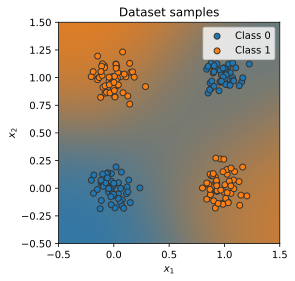

In [69]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()